# Julia kernel
* Reading `Julia 1.0 Programming - Second Edition`

In [1]:
x = 10

10

In [2]:
x

10

In [3]:
x+1

11

In [4]:
x = "my string"

"my string"

In [5]:
x

"my string"

In [6]:
pi

π = 3.1415926535897...

Make a function

In [7]:
f(x) = 2x+5

f (generic function with 1 method)

Test it

In [8]:
f(3)


11

See the LLVM code that represents the actual function

In [9]:
code_llvm(f, (Int64,)) 



; Function f
; Location: In[7]:1
; Function Attrs: uwtable
define i64 @julia_f_35843(i64) #0 {
top:
; Function *; {
; Location: int.jl:54
  %1 = shl i64 %0, 1
;}
; Function +; {
; Location: int.jl:53
  %2 = add i64 %1, 5
;}
  ret i64 %2
}


See assembly code for the function

In [10]:
code_native(f, (Int64,)) 

	.text
; Function f {
; Location: In[7]:1
	pushq	%rbp
	movq	%rsp, %rbp
; Function +; {
; Location: int.jl:53
	leaq	(%rcx,%rcx), %rax
	addq	$5, %rax
;}
	popq	%rbp
	retq
	nop
;}


In [11]:
code_native(f, (Float64,))

	.text
; Function f {
; Location: In[7]:1
	pushq	%rbp
	movq	%rsp, %rbp
; Function *; {
; Location: promotion.jl:314
; Function *; {
; Location: float.jl:399
	vaddsd	%xmm0, %xmm0, %xmm0
	movabsq	$333895064, %rax        # imm = 0x13E6D598
;}}
; Function +; {
; Location: promotion.jl:313
; Function +; {
; Location: float.jl:395
	vaddsd	(%rax), %xmm0, %xmm0
;}}
	popq	%rbp
	retq
	nopl	(%rax,%rax)
;}


In [12]:
y = 66

66

In [13]:
typeof(y)

Int64

Double quotes = string

In [14]:
z = "h"

"h"

In [15]:
typeof(z)

String

single quote = char

In [16]:
a = 'a'

'a': ASCII/Unicode U+0061 (category Ll: Letter, lowercase)

In [17]:
typeof(a)

Char

Julia tries to guess the type and won't allow some operations if types are mismatched

In [18]:
# y+z

In [19]:
# this is a comment

In [20]:
#= multi line
comment with amperstan and equals
last line =#
b = 12.3

12.3

In [21]:
typeof(b)

Float64

In [22]:
print(b)

12.3

Fancy print 

In [23]:
printstyled(b,color=:red)

12.3

In [24]:
function calc_dist(x1::Float64, x2::Float64)
    print("x1 is $x1 and x2 is $x2")
    return abs(x1 - x2)

end

calc_dist (generic function with 1 method)

In [25]:
calc_dist(1.,2.)

x1 is 1.0 and x2 is 2.0

1.0

Show a bit string representation

In [26]:
bitstring(1.4e5)

"0100000100000001000101110000000000000000000000000000000000000000"

In [27]:
d = true

true

In [28]:
e = false

false

Boolean AND or OR

In [29]:
println(d && e)
print(d || e)

false
true

In [30]:
mystring = "My string"

"My string"

Get the char value at some location in a string

In [31]:
mystring[3]

' ': ASCII/Unicode U+0020 (category Zs: Separator, space)

In [32]:
# loop over a string
for c in mystring
    print("-$c")
end

-M-y- -s-t-r-i-n-g

In [33]:
start = mystring[1:3] # note: start at 1 for strings. 
println(start)

My 


In [34]:
for i in 1:100
    print("_$i")
end

_1_2_3_4_5_6_7_8_9_10_11_12_13_14_15_16_17_18_19_20_21_22_23_24_25_26_27_28_29_30_31_32_33_34_35_36_37_38_39_40_41_42_43_44_45_46_47_48_49_50_51_52_53_54_55_56_57_58_59_60_61_62_63_64_65_66_67_68_69_70_71_72_73_74_75_76_77_78_79_80_81_82_83_84_85_86_87_88_89_90_91_92_93_94_95_96_97_98_99_100

In [35]:
vector = [1,2,3]
vector2 = [4,5,6]

3-element Array{Int64,1}:
 4
 5
 6

In [36]:
typeof(vector)

Array{Int64,1}

In [37]:
vector3 = vector+vector2

3-element Array{Int64,1}:
 5
 7
 9

In [38]:
arr4 = collect(1:7)

7-element Array{Int64,1}:
 1
 2
 3
 4
 5
 6
 7

In [39]:
push!(arr4,1)

8-element Array{Int64,1}:
 1
 2
 3
 4
 5
 6
 7
 1

In [40]:
eltype(arr4)

Int64

In [41]:
length(arr4)

8

In [42]:
ndims(arr4)

1

In [43]:
join(arr4, ", ")

"1, 2, 3, 4, 5, 6, 7, 1"

In [44]:
arr4[3:5]

3-element Array{Int64,1}:
 3
 4
 5

In [45]:
arr5 = zeros(3,4)

3×4 Array{Float64,2}:
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0

In [46]:
vector5 = range(0,step = 2, length=100)

0:2:198

In [47]:
for v in vector5
    print("_$v")
end

_0_2_4_6_8_10_12_14_16_18_20_22_24_26_28_30_32_34_36_38_40_42_44_46_48_50_52_54_56_58_60_62_64_66_68_70_72_74_76_78_80_82_84_86_88_90_92_94_96_98_100_102_104_106_108_110_112_114_116_118_120_122_124_126_128_130_132_134_136_138_140_142_144_146_148_150_152_154_156_158_160_162_164_166_168_170_172_174_176_178_180_182_184_186_188_190_192_194_196_198

In [48]:
fill!(arr5, 5)

3×4 Array{Float64,2}:
 5.0  5.0  5.0  5.0
 5.0  5.0  5.0  5.0
 5.0  5.0  5.0  5.0

In [49]:
vector_r = rand(Float32, 5)

5-element Array{Float32,1}:
 0.036063433
 0.44514203 
 0.48036408 
 0.46275818 
 0.89671683 

In [50]:
a = [1,2,3]
b = [2,3,4]
# append

3-element Array{Int64,1}:
 2
 3
 4

Add to an vector/array

In [51]:
append!(a,b)

6-element Array{Int64,1}:
 1
 2
 3
 2
 3
 4

In [52]:
pop!(a)

4

In [53]:
push!(a,45)

6-element Array{Int64,1}:
  1
  2
  3
  2
  3
 45

In [54]:
popfirst!(a)

1

In [55]:
a

5-element Array{Int64,1}:
  2
  3
  2
  3
 45

In [56]:
pushfirst!(a,23)

6-element Array{Int64,1}:
 23
  2
  3
  2
  3
 45

In [57]:
in(23, a)

true

In [58]:
in(-1, a)

false

In [59]:
c = sort(a)

6-element Array{Int64,1}:
  2
  2
  3
  3
 23
 45

# operations
* put a dot in front of it

In [60]:
c .+ 1

6-element Array{Int64,1}:
  3
  3
  4
  4
 24
 46

In [61]:
using LinearAlgebra

In [62]:
a = [1,2,3]
b = [4,5,6]
c = LinearAlgebra.dot(a,b)
c

32

In [63]:
d = a .+ b
d

3-element Array{Int64,1}:
 5
 7
 9

# Documentation for a type
* Use `methodswith`

In [64]:
methodswith(Array)

[1] copyto!(dest::Array{T,N} where N, doffs::Integer, src::Array{T,N} where N, soffs::Integer, n::Integer) where T in Base at array.jl:269
[2] copyto!(dest::Array{T,N} where N, src::Array{T,N} where N) where T in Base at array.jl:277
[3] copyto!(dest::BitArray, doffs::Integer, src::Array, soffs::Integer, n::Integer) in Base at bitarray.jl:428
[4] copyto!(dest::BitArray, src::Array) in Base at bitarray.jl:437
[5] copyto!(S::SharedArrays.SharedArray, A::Array) in SharedArrays at C:\cygwin\home\Administrator\buildbot\worker\package_win64\build\usr\share\julia\stdlib\v1.0\SharedArrays\src\SharedArrays.jl:577
[6] +(A::Array, Bs::Array...) in Base at arraymath.jl:44
[7] +(A::Array, B::SparseArrays.SparseMatrixCSC) in SparseArrays at C:\cygwin\home\Administrator\buildbot\worker\package_win64\build\usr\share\julia\stdlib\v1.0\SparseArrays\src\sparsematrix.jl:1584
[8] +(A::SparseArrays.SparseMatrixCSC, B::Array) in SparseArrays at C:\cygwin\home\Administrator\buildbot\worker\package_win64\build\usr\share\julia\stdlib\v1.0\SparseArrays\src\sparsematrix.jl:1583
[9] -(A::SparseArrays.SparseMatrixCSC, B::Array) in SparseArrays at C:\cygwin\home\Administrator\buildbot\worker\package_win64\build\usr\share\julia\stdlib\v1.0\SparseArrays\src\sparsematrix.jl:1585
[10] -(A::Array, B::SparseArrays.SparseMatrixCSC) in SparseArrays at C:\cygwin\home\Administrator\buildbot\worker\package_win64\build\usr\share\julia\stdlib\v1.0\SparseArrays\src\sparsematrix.jl:1586
[11] convert(T::Type{#s546} where #s546<:SharedArrays.SharedArray, a::Array) in SharedArrays at C:\cygwin\home\Administrator\buildbot\worker\package_win64\build\usr\share\julia\stdlib\v1.0\SharedArrays\src\SharedArrays.jl:359
[12] copy(a::T) where T<:Array in Base at array.jl:299
[13] dump(io::IOContext, x::Array, n::Int64, indent) in Base at show.jl:1656
[14] fill!(dest::Array{T,N} where N, x) where T in Base at array.jl:282
[15] getindex(A::Array, i1::Int64) in Base at array.jl:731
[16] getindex(A::Array, i1::Int64, i2::Int64, I::Int64...) in Base at array.jl:732
[17] getindex(A::Array, I::UnitRange{Int64}) in Base at array.jl:736
[18] getindex(A::Array, c::Colon) in Base at array.jl:746
[19] getindex(A::Array{S,N} where N, I::AbstractRange{Int64}) where S in Base at array.jl:756
[20] getindex(A::Array, i1::Union{Integer, CartesianIndex}, I::Union{Integer, CartesianIndex}...) in Base at multidimensional.jl:412
[21] isassigned(a::Array, i::Int64...) in Base at array.jl:204
[22] iterate(A::Array) in Base at array.jl:707
[23] iterate(A::Array, i) in Base at array.jl:707
[24] length(a::Array) in Base at array.jl:199
[25] permutedims!(P::Array{T,N}, B::Union{DenseArray{T,N}, ReinterpretArray{T,N,S,A} where S where A<:Union{SubArray{T,N,A,I,true} where I<:Tuple{AbstractUnitRange,Vararg{Any,N} where N} where A<:DenseArray where N where T, DenseArray}, ReshapedArray{T,N,A,MI} where MI<:Tuple{Vararg{SignedMultiplicativeInverse{Int64},N} where N} where A<:Union{ReinterpretArray{T,N,S,A} where S where A<:Union{SubArray{T,N,A,I,true} where I<:Tuple{AbstractUnitRange,Vararg{Any,N} where N} where A<:DenseArray where N where T, DenseArray} where N where T, SubArray{T,N,A,I,true} where I<:Tuple{AbstractUnitRange,Vararg{Any,N} where N} where A<:DenseArray where N where T, DenseArray}, SubArray{T,N,A,I,L} where L where I<:Tuple{Vararg{Union{Int64, AbstractRange{Int64}, AbstractCartesianIndex},N} where N} where A<:Union{ReinterpretArray{T,N,S,A} where S where A<:Union{SubArray{T,N,A,I,true} where I<:Tuple{AbstractUnitRange,Vararg{Any,N} where N} where A<:DenseArray where N where T, DenseArray} where N where T, ReshapedArray{T,N,A,MI} where MI<:Tuple{Vararg{SignedMultiplicativeInverse{Int64},N} where N} where A<:Union{ReinterpretArray{T,N,S,A} where S where A<:Union{SubArray{T,N,A,I,true} where I<:Tuple{AbstractUnitRange,Vararg{Any,N} where N} where A<:DenseArray where N where T, DenseArray} where N where T, SubArray{T,N,A,I,true} where I<:Tuple{AbstractUnitRange,Vararg{Any,N} where N} where A<:DenseArray w

# Chapter 3, functions

In [67]:
function mult(x,y)
    println("$x * $y")
    return x*y
end

mult (generic function with 1 method)

In [68]:
mult(1,2)

1 * 2


2

In [69]:
function mult_out(x,y)
    return x*y, x+y, x/y
end

mult_out (generic function with 1 method)

In [71]:
mult_out(3,8)

(24, 11, 0.375)

In [73]:
function mult_many(args ...)
    r = 1
    for a in args
        r  = r*a
    end
    return r
end

mult_many (generic function with 1 method)

In [74]:
mult_many(1,2,3,4,5)

120

In [75]:
# Short syntax for function
mult_short(x,y) = x*y

mult_short (generic function with 1 method)

In [76]:
mult_short(4,5)

20

In [77]:
f_with_optional(x,y = 5)= x*y

f_with_optional (generic function with 2 methods)

In [78]:
f_with_optional(4)

20

In [79]:
f_with_optional(4,3)

12

# Named positional args after the semi-colon

In [81]:
k(x; a1 = 1, a2 = 2) = x * (a1 + a2) 

k (generic function with 1 method)

In [85]:
k(1, a1 = 2)
# k(1,  2) # this would fail

4

In [86]:
plustwo = function (x) x + 2  end

#5 (generic function with 1 method)

In [87]:
plustwo(4)

6

In [88]:
plustwo = (x)-> x+2

#7 (generic function with 1 method)

In [89]:
plustwo(10)

12

We can pass functions to functions

In [94]:
function numerical_derivative(f, x, dx=0.01) 
    derivative = (f(x+dx) - f(x-dx))/(2*dx) 
    return derivative 
end 

numerical_derivative (generic function with 2 methods)

In [95]:
parabola = (x) -> x^2

#11 (generic function with 1 method)

In [96]:
parabola(4)

16

In [97]:
numerical_derivative(parabola, 1)

2.0000000000000018

Functions can return functions

In [98]:
function derivative(f) 
    return function(x)   
  # pick a small value for h 
        h = x == 0 ? sqrt(eps(Float64)) : sqrt(eps(Float64)) * x 
        xph = x + h 
        dx = xph - x 
        f1 = f(xph) # evaluate f at x + h 
        f0 = f(x) # evaluate f at x 
        return (f1 - f0) / dx  # divide by h 
    end 
end 

derivative (generic function with 1 method)

In [99]:
parabola_deriv = derivative(parabola)

#13 (generic function with 1 method)

In [100]:
parabola_deriv(-1)

-2.000000014901161

# documentation for a function
* Put a question mark in front `? function`
* Also `@doc function` 
* `dir(obj)` can be helpful
* `fieldnames(obj)` is also helpful

In [105]:
# ? eps

In [110]:
# @doc eps

Define a function only inside of a function to protect it

In [111]:
function counter() 
    n = 0 
    () -> n += 1, () -> n = 0 
end 

counter (generic function with 1 method)

In [112]:
(addOne, reset) = counter()

(getfield(Main, Symbol("##15#17"))(Core.Box(0)), getfield(Main, Symbol("##16#18"))(Core.Box(0)))

In [113]:
addOne()
addOne()

2

In [114]:
addOne()


3

In [115]:
reset()

0

In [116]:
addOne()

1

Currying

In [117]:
function add(x) 
    return function f(y) 
        return x + y 
    end 
end 

add (generic function with 1 method)

In [118]:
add(4)(5)

9

# broad cast a function over an array of elements

In [119]:
arr = [ pi, pi/2,0]

3-element Array{Float64,1}:
 3.141592653589793 
 1.5707963267948966
 0.0               

In [122]:
# calculate sin for each element
sin.(arr)

3-element Array{Float64,1}:
 1.2246467991473532e-16
 1.0                   
 0.0                   

In [123]:
square = (x)-> x^2

#20 (generic function with 1 method)

# map a function to an arry

In [124]:
map(square, [-1,0,1])

3-element Array{Int64,1}:
 1
 0
 1

In [125]:
is_zero = (x) -> x==0

#22 (generic function with 1 method)

In [126]:
is_zero(0), is_zero(1)

(true, false)

In [127]:
filter(is_zero, collect(-3:3))

1-element Array{Int64,1}:
 0

# List comprehension

In [130]:
vector = [x^2 for x in 1:6]

6-element Array{Int64,1}:
  1
  4
  9
 16
 25
 36

Double comprehension
* although the location of the index isn't clear

In [133]:
array1 = Float32[x*y for x in 1:5, y in 1:6]

5×6 Array{Float32,2}:
 1.0   2.0   3.0   4.0   5.0   6.0
 2.0   4.0   6.0   8.0  10.0  12.0
 3.0   6.0   9.0  12.0  15.0  18.0
 4.0   8.0  12.0  16.0  20.0  24.0
 5.0  10.0  15.0  20.0  25.0  30.0

Multi-dispatch
* different args give different behaviors but with the same name
* so they arg types are important
* same in C#

In [134]:
f(n, m) = "base case" 
f(n::Number, m::Number) = "n and m are both numbers" 
f(n::Number, m) = "n is a number" 
f(n, m::Number) = "m is a number" 
f(n::Integer, m::Integer) = "n and m are both integers"

f (generic function with 6 methods)

In [135]:
f(1,2)

"n and m are both integers"

In [136]:
f("hi", "yes")

"base case"

## see the overloaded function
* type `methods(fuction)`

In [137]:
methods(f)

# 6 methods for generic function "f":
[1] f(n::Integer, m::Integer) in Main at In[134]:5
[2] f(n::Number, m::Number) in Main at In[134]:2
[3] f(n::Number, m) in Main at In[134]:3
[4] f(x) in Main at In[7]:1
[5] f(n, m::Number) in Main at In[134]:4
[6] f(n, m) in Main at In[134]:1

In [138]:
methods(sort)

# 5 methods for generic function "sort":
[1] sort(r::AbstractUnitRange) in Base at range.jl:936
[2] sort(r::AbstractRange) in Base at range.jl:939
[3] sort(x::SparseArrays.SparseVector{Tv,Ti}; kws...) where {Tv, Ti} in SparseArrays at C:\cygwin\home\Administrator\buildbot\worker\package_win64\build\usr\share\julia\stdlib\v1.0\SparseArrays\src\sparsevector.jl:1859
[4] sort(v::AbstractArray{T,1} where T; kws...) in Base.Sort at sort.jl:747
[5] sort(A::AbstractArray; dims, alg, lt, by, rev, order) in Base.Sort at sort.jl:966

In [253]:
using Plots

In [272]:
my_function = (x)-> x^2+x
my_function_r = (x)-> (x+2.5)^2-2 .+ rand(1)[1]*0.1

#132 (generic function with 1 method)

In [358]:
function my_function2(x)
    y = (x+0.5)^2
    if abs(x-0.2)<0.3
        y+= (x+0.2)^2
    end
    return y
end

my_function2 (generic function with 1 method)

In [359]:
x = range(-1,stop=1,length=50)
y = my_function2.(x);

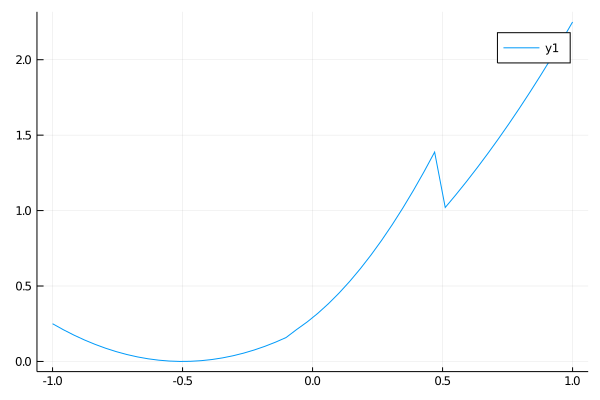

In [360]:
plot(x,y)

In [361]:
rand(1)[1]*0.1

0.036553039473967285

In [362]:
my_function(2)

6

In [363]:
trial_x =[x for x in  range(-20,stop = 20)];
argmin(trial_x)
# trial_x
# [x1^2 for x1 in x]

1

In [365]:
function find_a_min(funct_input, start = 1)
    f_dydx = derivative(funct_input)
    # println("found f_dydx")
    # trial_x =[x for x in  range(-20,stop = 20)]
    # y = funct_input.(trial_x) # NOTE the dot for element wise computation
    # idx = argmin(y)
    # x_i = trial_x[idx] # x sub i
    x_i = start
    # println("argmin is $idx with x value of $x_i")
    step = 1e-2
    eps_ = 1e-7
    x_list = []
    dydx_list = []
    for i in range(1,length = 3000)
        # get the gradient
        dydx = f_dydx(x_i)
        if abs(dydx)<eps_
            println("Found a min at $x_i. Iteration $i")
            return x_i,x_list,dydx_list
        end
        x_delta = -dydx*step # step in the negative gradient
        x_i = x_i+x_delta
        push!(x_list, x_i)
        push!(dydx_list, dydx)


    end

    println("Did NOT terminate. x =  $x_i")
    return x_i,x_list,dydx_list
end

find_a_min (generic function with 2 methods)

Found a min at -0.4999999472113128. Iteration 839
  0.000404 seconds (4.24 k allocations: 99.500 KiB)


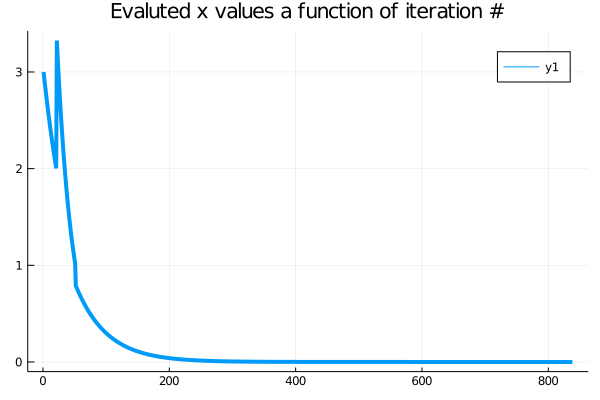

In [370]:

@time x, xs,dydx_list = find_a_min(my_function2);
plot(dydx_list, lw = 4, title = "Evaluted x values a function of iteration #")

In [283]:
function find_a_min_momentum(funct_input, start = 1)
    f_dydx = derivative(funct_input)
    # # println("found f_dydx")
    # trial_x =[x for x in  range(-20,stop = 20)]
    # y = funct_input.(trial_x) # NOTE the dot for element wise computation
    # idx = argmin(y)
    x_i = start # trial_x[idx] # x sub i
    # println("argmin is $idx with x value of $x_i")
    step = 1e-1
    m_t = 0
    m_t_minus_1 = 0
    beta = 0.5
    eps_ = 1e-7
    x_list = []
    for i in range(1,length = 3000)
        # get the gradient
        dydx = f_dydx(x_i)
        if abs(dydx)<eps_
            println("Found a min at $x_i. Iteration $i")
            return x_i,x_list
        end
        m_t = beta*m_t_minus_1+(1-beta)*dydx
        x_delta = -m_t*step # step in the negative gradient
        x_i = x_i+x_delta
        m_t_minus_1 = m_t
        push!(x_list, x_i)


    end

    println("Did NOT terminate. x =  $x_i")
    return x_i,x_list
end

find_a_min_momentum (generic function with 2 methods)

In [284]:
@time x, xs = find_a_min_momentum(my_function);

Found a min at -0.49999999971101844. Iteration 42
  0.016712 seconds (47.75 k allocations: 2.563 MiB)


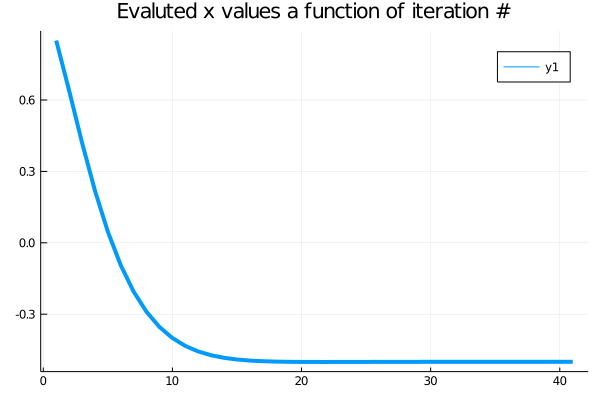

In [285]:
plot(xs, lw = 4, title = "Evaluted x values a function of iteration #")

In [294]:
function find_a_min_rmsp(funct_input, start = 1)
    f_dydx = derivative(funct_input)
    # # println("found f_dydx")
    # trial_x =[x for x in  range(-20,stop = 20)]
    # y = funct_input.(trial_x) # NOTE the dot for element wise computation
    # idx = argmin(y)
    x_i = start # trial_x[idx] # x sub i
    # println("argmin is $idx with x value of $x_i")
    step = 1e-1 # basically the learning rate. 
    v_t = 0
    v_t_minus_1 = 0
    beta = 0.9
    eps_ = 1e-7
    x_list = []
    for i in range(1,length = 3000)
        # get the gradient
        dydx = f_dydx(x_i)
        if abs(dydx)<eps_
            println("Found a min at $x_i. Iteration $i")
            return x_i,x_list
        end
        # m_t = beta*m_t_minus_1+(1-beta)*dydx
        v_t = beta*v_t_minus_1 +(1-beta)*dydx^2
        update_term = 1/(v_t+1e-9)*dydx
        x_delta = -update_term*step # step in the negative gradient
        x_i = x_i+x_delta
        v_t_minus_1 = v_t
        push!(x_list, x_i)


    end

    println("Did NOT terminate. x =  $x_i")
    return x_i,x_list
end

find_a_min_rmsp (generic function with 2 methods)

In [297]:
@time x, xs = find_a_min_rmsp(my_function);

Found a min at -0.5000000064818624. Iteration 32
  0.000367 seconds (408 allocations: 7.563 KiB)


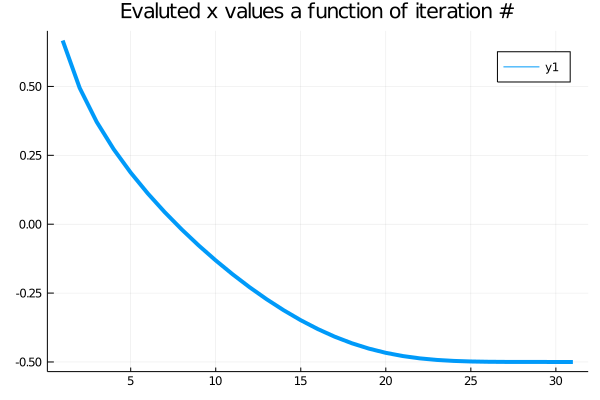

In [298]:
plot(xs, lw = 4, title = "Evaluted x values a function of iteration #")

In [ ]:
function find_a_min_adam(funct_input, start = 1)
    f_dydx = derivative(funct_input)
    # # println("found f_dydx")
    # trial_x =[x for x in  range(-20,stop = 20)]
    # y = funct_input.(trial_x) # NOTE the dot for element wise computation
    # idx = argmin(y)
    x_i = start # trial_x[idx] # x sub i
    # println("argmin is $idx with x value of $x_i")
    step = 1e-1 # basically the learning rate. 
    v_t = 0
    v_t_minus_1 = 0
    beta_1 = 0.9
    beta_2 = 0.9
    eps_ = 1e-7
    x_list = []
    for i in range(1,length = 3000)
        # get the gradient
        dydx = f_dydx(x_i)
        if abs(dydx)<eps_
            println("Found a min at $x_i. Iteration $i")
            return x_i,x_list
        end
        # m_t = beta*m_t_minus_1+(1-beta)*dydx
        v_t = beta*v_t_minus_1 +(1-beta)*dydx^2
        update_term = 1/(v_t+1e-9)*dydx
        x_delta = -update_term*step # step in the negative gradient
        x_i = x_i+x_delta
        v_t_minus_1 = v_t
        push!(x_list, x_i)


    end

    println("Did NOT terminate. x =  $x_i")
    return x_i,x_list
end

In [165]:
# @doc range(length=200)
for i in range(1,length = 3)
    print(i)
end

123

In [176]:
x_list = []

0-element Array{Any,1}

In [177]:
@doc push

No documentation found.

Binding `push` does not exist.


In [179]:
# code_native(f, (Any,)) 